In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
print('-'*25)
from sklearn.metrics import confusion_matrix

-------------------------


In [2]:
data = pd.read_csv('People_Charm.csv')

In [3]:
data.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [4]:
data.shape

(14999, 10)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
data.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [7]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

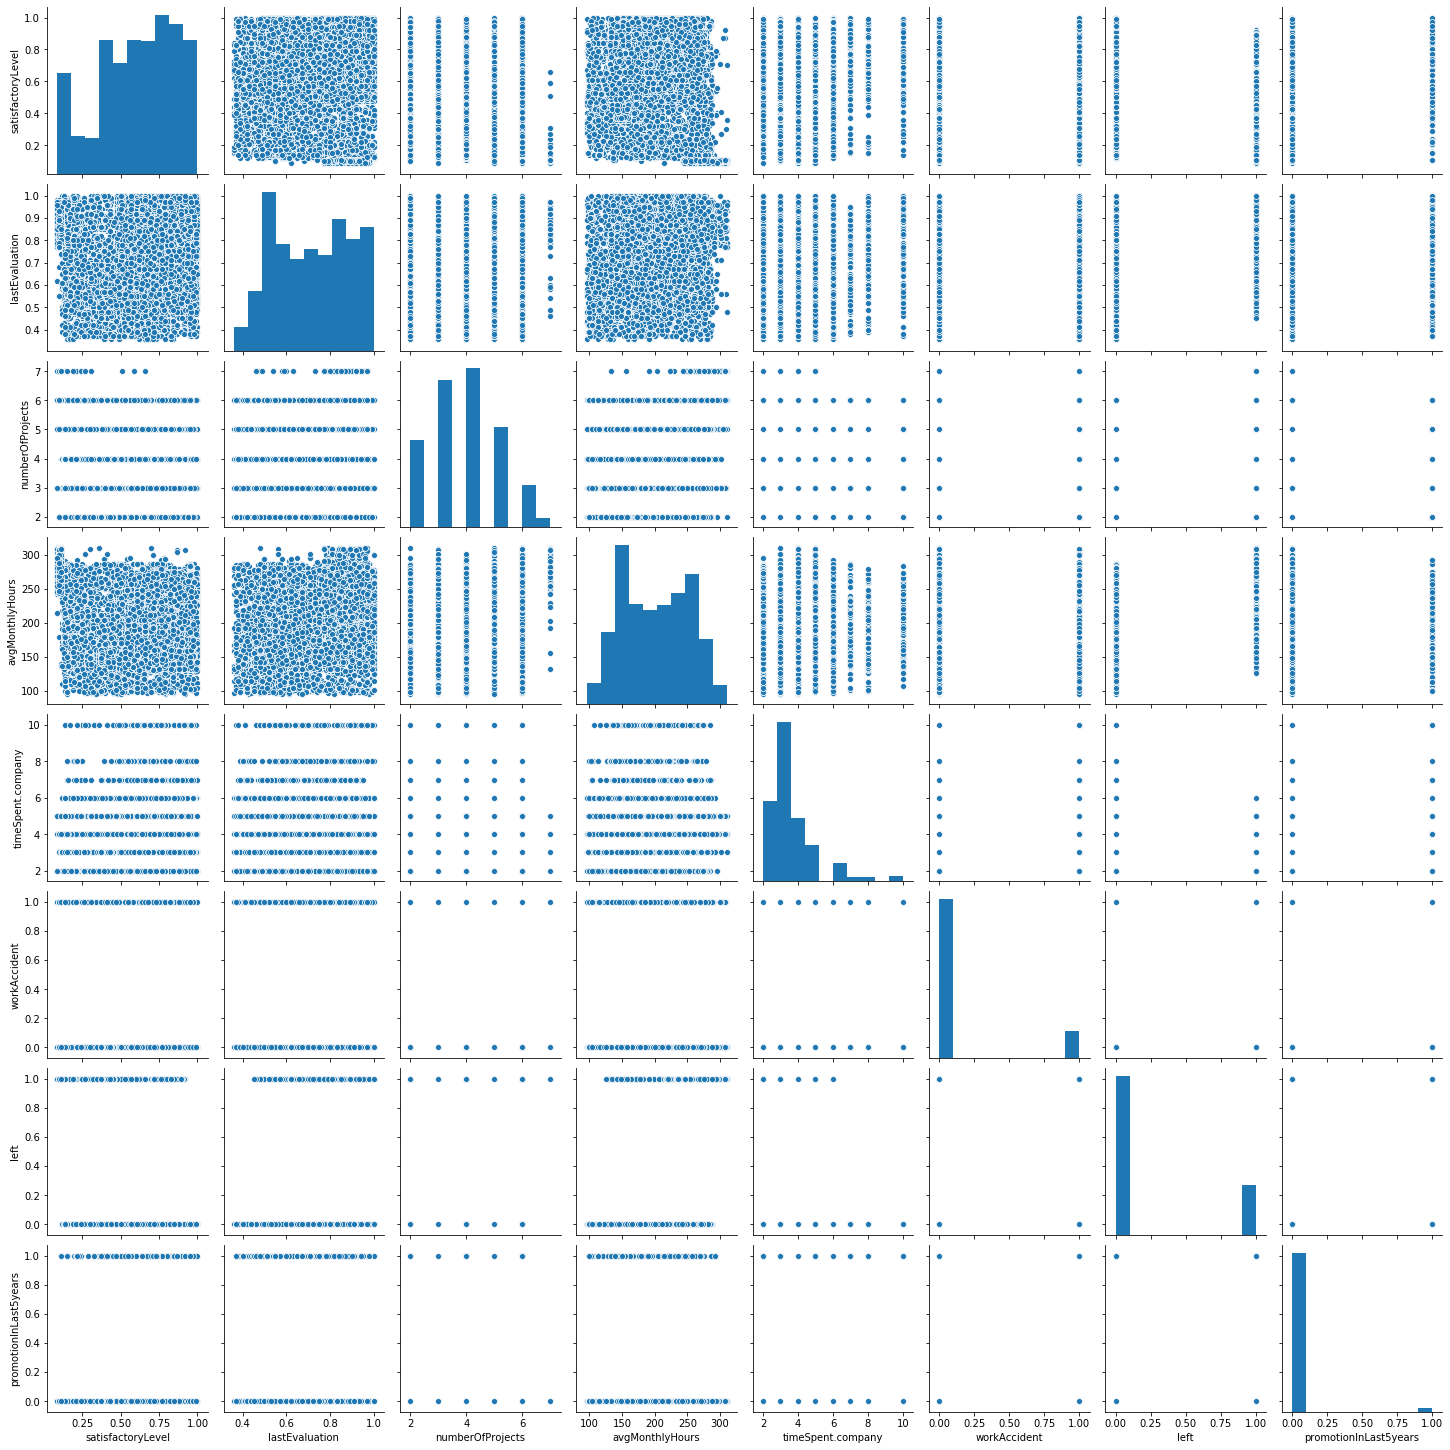

In [8]:
sb.pairplot(data)

In [9]:
data.isnull().sum()/len(data)*100

satisfactoryLevel        0.0
lastEvaluation           0.0
numberOfProjects         0.0
avgMonthlyHours          0.0
timeSpent.company        0.0
workAccident             0.0
left                     0.0
promotionInLast5years    0.0
dept                     0.0
salary                   0.0
dtype: float64

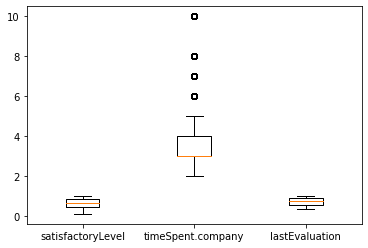

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot([data["satisfactoryLevel"], data["timeSpent.company"], data["lastEvaluation"]])
plt.xticks([1,2,3],["satisfactoryLevel", "timeSpent.company", "lastEvaluation"])
plt.show()

In [11]:
# Now lets cap the outliers

Q1 = data["timeSpent.company"].quantile(0.25)
Q3 = data["timeSpent.company"].quantile(0.75)
IQR = Q3 - Q1

out_ls = []
for i in data["timeSpent.company"]:
    if(i < Q1 - (1.5 * IQR)):
        i = Q1 - (1.5 * IQR)
        out_ls.append(i)
    elif (i > Q3 + (1.5 * IQR)):
        i = Q3 + (1.5 * IQR)
        out_ls.append(i)
    else:
        out_ls.append(i)

In [12]:
# Lets drop the original column which had the outliers and add a new one with the capped value

data = data.drop(columns = ["timeSpent.company"])
data["timeSpent.company"] = out_ls

In [13]:
salarycount = data.pivot_table(index = ["dept"], values = "left", aggfunc = np.size).sort_values(by = "left", ascending = False)
salarycount

,left
dept,
sales,4140
technical,2720
support,2229
IT,1227
product_mng,902
marketing,858
RandD,787
accounting,767
hr,739


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data["dept"] = le.fit_transform(data["dept"])
#data["dept"]

In [15]:
data["dept"].unique()

array([7, 2, 3, 9, 8, 0, 6, 5, 4, 1])

In [16]:
salarycount2=data.pivot_table(index= ["salary"], values ="left",aggfunc = np.size).sort_values(by="left", ascending = False)
salarycount2

,left
salary,
low,7316
medium,6446
high,1237


In [17]:
# Label encoding the numerical transformed variable salary

le = LabelEncoder()
data["salary"] = le.fit_transform(data["salary"])

In [18]:
data["salary"].unique()

array([1, 2, 0])

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB , BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
# Dropping the target variable column at the end and dropping the duplicate

data["Target_left"] = data["left"]
data = data.drop("left",axis=1)

# Checking for Correlation

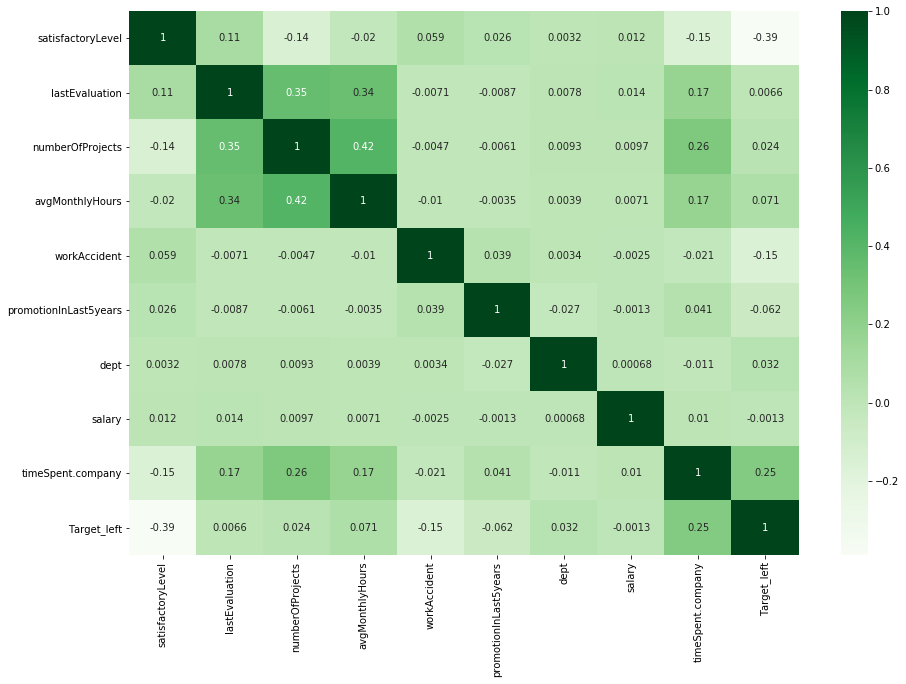

In [21]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True, cmap = "Greens")

# Skewness in the data:

Here we are using distplot from seaborn in order to see the skewness in the data visually.

<function matplotlib.pyplot.show(*args, **kw)>

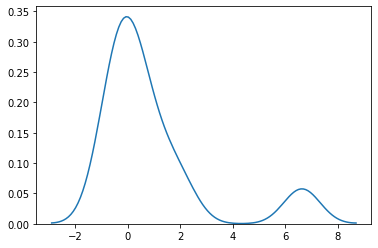

In [22]:
sns.distplot(data.skew(),hist=False)
plt.show

# There might be Imbalanced data:

- In the below graph we can easily see that the data has imbalanced classification.
- The data is imbalanced by the ratio of 3:1
- 76% of belongs to the class -0 and 24% belongs to class -1.

Text(0.5, 1.0, 'Class Frequncy')

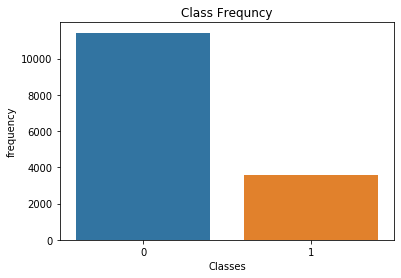

In [56]:
import seaborn as sns
sns.countplot(data["Target_left"])
plt.xlabel("Classes")
plt.ylabel("frequency")
plt.title("Class Frequncy")

In [48]:
print("Classification Balance: ", '\n',data["Target_left"].value_counts())

Classification Balance:  
 0    11428
1     3571
Name: Target_left, dtype: int64


In [24]:
# Splitting the Data into Training and Test datasets

x = data[["satisfactoryLevel","salary","workAccident","timeSpent.company","avgMonthlyHours","promotionInLast5years","numberOfProjects"]]
y = data.iloc[:,-1]
x_log = data[["satisfactoryLevel","salary","workAccident","timeSpent.company","avgMonthlyHours","promotionInLast5years","numberOfProjects"]].apply(lambda x : np.log(x+1))
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)
xl_train, xl_test, yl_train, yl_test = train_test_split(x_log, y, test_size = 0.2,random_state = 42)
x.shape

(14999, 7)

In [25]:
#[y_test]

In [26]:
# KNN

k_list = [i for i in range (1, 30) ]

mis_class=[]

for k in k_list:
    knn=KNeighborsClassifier(n_neighbors = k)
    knn.fit(x_train,y_train)
    prediction=knn.predict(x_test)
    mis_class.append(sum(prediction!= y_test))

In [27]:
#print(mis_class)

KNN Score =  95.8
Confusion Matrix : 
[[2181   91]
 [  35  693]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2272
           1       0.88      0.95      0.92       728

    accuracy                           0.96      3000
   macro avg       0.93      0.96      0.94      3000
weighted avg       0.96      0.96      0.96      3000



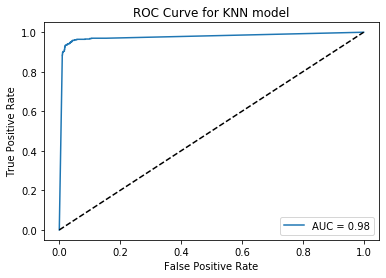

In [28]:
knn = KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
knn.fit(x_train, y_train)
print("KNN Score = ", knn.score(x_test, y_test)*100)
knn_pred = knn.predict(x_test)
knn_cm = confusion_matrix(y_test, knn_pred)

print("Confusion Matrix : ", knn_cm, sep = '\n')
print("Classification Report : ", classification_report(y_test, knn_pred), sep = "\n")

pred_probknn = knn.predict_proba(x_test)
auc_knn = roc_auc_score(y_test,pred_probknn[:,1])
fprkn,tprkn,thresholdskn = roc_curve(y_test,pred_probknn[:,1])
plt.plot(fprkn,tprkn,label = "AUC = %.2f" %  auc_knn )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN model")
plt.plot([0,1],[0,1], color = 'black', linestyle = "--")
plt.legend()

In [29]:
# KNN
# performing model fitting on the log transformed

knn= KNeighborsClassifier(n_neighbors = 9, weights = 'distance')
knn.fit(xl_train, yl_train)
knn_predl = knn.predict(xl_test)
knn_cml = confusion_matrix(yl_test, knn_predl)
knn_accl = accuracy_score(yl_test, knn_predl)

print("confusion matrix :" ,knn_cml, sep = "\n")
print("Accuracy : ",knn_accl, sep = "\n")
print("Classification Report : ",classification_report(yl_test, knn_predl), sep = "\n")

confusion matrix :
[[2233   39]
 [  33  695]]
Accuracy : 
0.976
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      2272
           1       0.95      0.95      0.95       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



Confusion Matrix :
[[1871  401]
 [ 192  536]]
Accuracy : 
0.8023333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.91      0.82      0.86      2272
           1       0.57      0.74      0.64       728

    accuracy                           0.80      3000
   macro avg       0.74      0.78      0.75      3000
weighted avg       0.83      0.80      0.81      3000



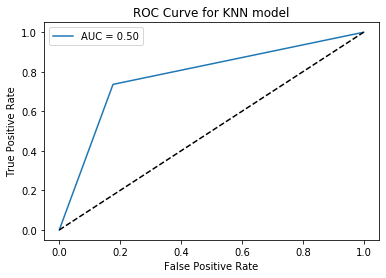

In [30]:
# Gaussian NB
# performing model fitting log transformed

gnb = GaussianNB()
gnb.fit(xl_train, yl_train)
gnb_predl = gnb.predict(xl_test)
gnb_cml = confusion_matrix(yl_test, gnb_predl)
gnb_accl = accuracy_score(yl_test, gnb_predl)

print("Confusion Matrix :" ,gnb_cml,sep="\n")
print("Accuracy : ",gnb_accl,sep="\n")
print("Classification Report : ",classification_report(yl_test, gnb_predl),sep="\n")

pred_probgnb = gnb.predict_proba(x_test)
auc_gnb = roc_auc_score(y_test,pred_probgnb[:,1])
fprkn,tprkn,thresholdskn = roc_curve(y_test, gnb_predl)
plt.plot(fprkn,tprkn,label = "AUC = %.2f" %  auc_gnb )
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for KNN model")
plt.plot([0,1],[0,1], color = 'black', linestyle = "--")
plt.legend()

confusion matrix : 
[[2246   26]
 [  32  696]]
Accuracy : 
0.9806666666666667
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.96      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



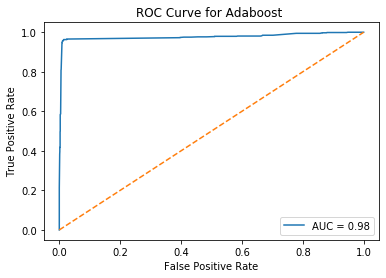

In [31]:
# ADABOOST

ab = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=10,learning_rate=1.0,random_state=3)
ab.fit(x_train,y_train)
ab_pred = ab.predict(x_test)
ab_cm = confusion_matrix(y_test,ab_pred)
ab_acc = accuracy_score(y_test,ab_pred)

print("confusion matrix : " ,ab_cm,sep="\n")
print("Accuracy : ",ab_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,ab_pred),sep="\n")

pred_probab = ab.predict_proba(x_test)
auc_ab = roc_auc_score(y_test,pred_probab[:,1])
fprab,tprab,thresholdsab = roc_curve(y_test,pred_probab[:,1])
plt.plot(fprab,tprab,label = "AUC = %.2f" % auc_ab)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Adaboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

confusion matrix :
[[2235   37]
 [  58  670]]
Accuracy : 
0.9683333333333334
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      2272
           1       0.95      0.92      0.93       728

    accuracy                           0.97      3000
   macro avg       0.96      0.95      0.96      3000
weighted avg       0.97      0.97      0.97      3000



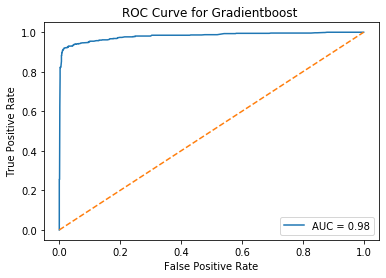

In [32]:
# GradientBOOST

gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.9)
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)
gb_cm = confusion_matrix(y_test,gb_pred)
gb_acc = accuracy_score(y_test,gb_pred)

print("confusion matrix :" ,gb_cm,sep="\n")
print("Accuracy : ",gb_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,gb_pred),sep="\n")

pred_probgb = gb.predict_proba(x_test)
auc_gb = roc_auc_score(y_test,pred_probgb[:,1])
fprgb,tprgb,thresholdsgb = roc_curve(y_test,pred_probgb[:,1])
plt.plot(fprgb,tprgb,label = "AUC = %.2f" % auc_gb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Gradientboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

confusion matrix :
[[2241   31]
 [  29  699]]
Accuracy : 
0.98
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.96      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



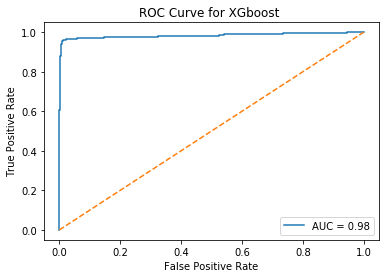

In [33]:
# XGBOOST

xgb = XGBClassifier(n_estimators=800,learning_rate=0.8)
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)
xgb_cm = confusion_matrix(y_test,xgb_pred)
xgb_acc = accuracy_score(y_test,xgb_pred)
print("confusion matrix :" ,xgb_cm,sep="\n")
print("Accuracy : ",xgb_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,xgb_pred),sep="\n")


pred_prob_xgb = xgb.predict_proba(x_test)
auc_xgb = roc_auc_score(y_test,pred_prob_xgb[:,1])
fprxgb,tprxgb,thresholdsxgb = roc_curve(y_test,pred_prob_xgb[:,1])
plt.plot(fprxgb,tprxgb,label = "AUC = %.2f" % auc_xgb)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

confusion matrix :
[[2238   34]
 [  28  700]]
Accuracy : 
0.9793333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.95      0.96      0.96       728

    accuracy                           0.98      3000
   macro avg       0.97      0.97      0.97      3000
weighted avg       0.98      0.98      0.98      3000



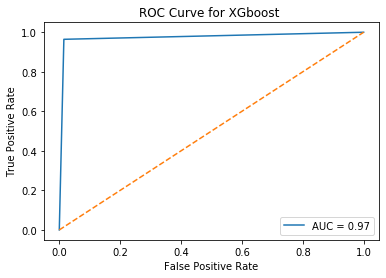

In [34]:
# Decision Tree

DT = DecisionTreeClassifier(criterion="entropy",max_depth=32)
DT.fit(x_train,y_train)
DT_pred = DT.predict(x_test)
DT_cm = confusion_matrix(y_test,DT_pred)
DT_acc = accuracy_score(y_test,DT_pred)
print("confusion matrix :" ,DT_cm,sep="\n")
print("Accuracy : ",DT_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,DT_pred),sep="\n")

pred_prob_DT = DT.predict_proba(x_test)
auc_DT = roc_auc_score(y_test,pred_prob_DT[:,1])
fprDT,tprDT,thresholdsDT = roc_curve(y_test,pred_prob_DT[:,1])
plt.plot(fprDT,tprDT,label = "AUC = %.2f" % auc_DT)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for XGboost ")
plt.plot([0,1],[0,1],"--")
plt.legend()

confusion matrix :
[[2260   12]
 [  32  696]]
Accuracy : 
0.9853333333333333
Classification Report : 
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2272
           1       0.98      0.96      0.97       728

    accuracy                           0.99      3000
   macro avg       0.98      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



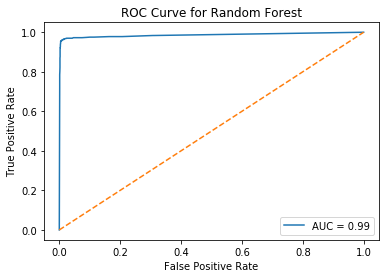

In [35]:
# RandomForest

rf = RandomForestClassifier(criterion = "entropy",max_depth = 32)
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)
rf_cm = confusion_matrix(y_test,rf_pred)
rf_acc = accuracy_score(y_test,rf_pred)

print("confusion matrix :" ,rf_cm,sep="\n")
print("Accuracy : ",rf_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,rf_pred),sep="\n")

pred_prob_rf = rf.predict_proba(x_test)
auc_rf = roc_auc_score(y_test,pred_prob_rf[:,1])
fprrf,tprrf,thresholdsrf = roc_curve(y_test,pred_prob_rf[:,1])
plt.plot(fprrf,tprrf,label = "AUC = %.2f" % auc_rf)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Random Forest")
plt.plot([0,1],[0,1],"--")
plt.legend()

confusion matrix :
[[1739  533]
 [ 122  606]]
Accuracy : 
0.7816666666666666
Classification Report : 
              precision    recall  f1-score   support

           0       0.93      0.77      0.84      2272
           1       0.53      0.83      0.65       728

    accuracy                           0.78      3000
   macro avg       0.73      0.80      0.75      3000
weighted avg       0.84      0.78      0.79      3000



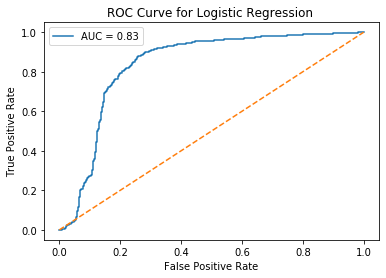

In [36]:
# Logistic Regression

log = LogisticRegression(class_weight = "balanced")
log.fit(x_train,y_train)
log_pred = log.predict(x_test)
log_cm = confusion_matrix(y_test,log_pred)
log_acc = accuracy_score(y_test,log_pred)
print("confusion matrix :" ,log_cm,sep="\n")
print("Accuracy : ",log_acc,sep="\n")
print("Classification Report : ",classification_report(y_test,log_pred),sep="\n")

pred_prob_log = log.predict_proba(x_test)
fpr,tpr,thresholds = roc_curve(y_test,pred_prob_log[:,1])
logit_roc_auc = roc_auc_score(y_test,pred_prob_log[:,1])
plt.plot(fpr,tpr,label = "AUC = %.2f" % logit_roc_auc)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression ")
plt.plot([0,1],[0,1],"--")
plt.legend()

In [37]:
print("Area under the curve is {}".format(logit_roc_auc))

Area under the curve is 0.8347742706237424


In [38]:
# These are the predicted possibilities

probabilities = log.predict_proba(x_test)
probabilities

array([[0.40132631, 0.59867369],
       [0.50277692, 0.49722308],
       [0.51064978, 0.48935022],
       ...,
       [0.93858779, 0.06141221],
       [0.12129383, 0.87870617],
       [0.13654672, 0.86345328]])

In [39]:
# We need to make sure to reduce the FPR by setting a threshold using Binarize

# But before this we need to set a desired value to reduce the False positive values.

threshold_df = pd.DataFrame({"fpr":fpr.round(2),"tpr":tpr.round(2),"Threshold":thresholds.round(2)})
threshold_df[(threshold_df["fpr"]==0.25) & (threshold_df["tpr"]==0.86)]

,fpr,tpr,Threshold
577,0.25,0.86,0.47
578,0.25,0.86,0.47
579,0.25,0.86,0.47
580,0.25,0.86,0.47
581,0.25,0.86,0.47
582,0.25,0.86,0.47
583,0.25,0.86,0.47
584,0.25,0.86,0.47
585,0.25,0.86,0.47


In [40]:
from sklearn.preprocessing import binarize
pred_prob = probabilities[:,1]
pred_new_y = binarize([pred_prob],threshold = 0.47)
pred_new_y = pred_new_y.flatten()

# Now we use this new predicted values which were determined by using 0.47 as threshold values for prediction of model
# Here we can see the False positives has reduced, also there is a reduction in the in the accuracy

log_acc_new = accuracy_score(y_test,pred_new_y)
log_cm_new = confusion_matrix(y_test,pred_new_y)

print("confusion matrix :" ,log_cm_new,sep="\n")
print("Accuracy : ",log_acc_new,sep="\n")
print("Classification Report : ",classification_report(y_test,pred_new_y),sep="\n")

confusion matrix :
[[1700  572]
 [  97  631]]
Accuracy : 
0.777
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      2272
           1       0.52      0.87      0.65       728

    accuracy                           0.78      3000
   macro avg       0.74      0.81      0.74      3000
weighted avg       0.84      0.78      0.79      3000



In [41]:
list_ac = [xgb_pred,gb_pred,ab_pred,gnb_predl,knn_pred,DT_pred,rf_pred,pred_new_y]
list_area = []
list_acc = []

for i in list_ac:
    list_acc.append(accuracy_score(y_test,i))
    list_area.append(roc_auc_score(y_test,i))
    
area_auc_DF = pd.DataFrame({"model":["XGBoost","GradientBoost","AdaBoost","GaussianNB","KNNClassifier","DecisionTree","RandomForest","LogisticRegression"],
                            "AUC":list_area,"Accuracy":list_acc}) 
area_auc_DF.sort_values(by=["AUC","Accuracy"],ascending=[False,False])

,model,AUC,Accuracy
6,RandomForest,0.975381,0.985333
5,DecisionTree,0.973287,0.979333
0,XGBoost,0.973260,0.980000
2,AdaBoost,0.972300,0.980667
4,KNNClassifier,0.955935,0.958000
1,GradientBoost,0.952022,0.968333
7,LogisticRegression,0.807499,0.777000
3,GaussianNB,0.779884,0.802333


In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
# CROSS VALIDATION SCORE FOR LOGISTIC :

list1 = [LogisticRegression(),RandomForestClassifier(),KNeighborsClassifier(),XGBClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),DecisionTreeClassifier(),GaussianNB()]
ls = []
for i in list1:
    c = cross_val_score(i,x,y,cv=7)
    ls.append(c)

In [44]:
mean_acc=[]
for i in ls:
    mean_acc.append(i.mean())

In [45]:
mean_acc

[0.7551165434286952,
 0.9887991282996322,
 0.9401293570780311,
 0.970598038562135,
 0.9517297664127092,
 0.9704648074815554,
 0.9769314476451648,
 0.8103197415223671]

In [46]:
# Creating dataframe with models and average mean using K-fold Cross validation

list4 = ["LogisticRegression","RandomForestClassifier","KNeighborsClassifier","XGBClassifier","AdaBoostClassifier","GradientBoostingClassifier","DecisionTreeClassifier","GaussianNB"]

model_df = pd.DataFrame({"Model":list4,"Avg_Accuracy":mean_acc})
model_df.sort_values(by = "Avg_Accuracy",ascending = False)

,Model,Avg_Accuracy
1,RandomForestClassifier,0.988799
6,DecisionTreeClassifier,0.976931
3,XGBClassifier,0.970598
5,GradientBoostingClassifier,0.970465
4,AdaBoostClassifier,0.951730
2,KNeighborsClassifier,0.940129
7,GaussianNB,0.810320
0,LogisticRegression,0.755117


# PROJECT OVERVIEW :
# Exploratory Data Analysis :

- Checking the shape of the data
- Checking the dtype of each column in the dataset.
- Treating the Null or missing values in the dataset.
- Checking the Skewness of the data.
- Checking wether the data is imbalanced or not.
- Treating the outliers in the dataset.

# Checking the Correlation & Skewness :

- Correlation is checked using the heatmap.
- Using only highly correlated variables for further modelling.
- From the graph plotted above we can infer that the data is heavily right skewed.

# Data Splitting :

- Data is splitted by keeping 20% of data for testing and remaining for training.
- Random_state is used for evaluation of the model on the same samples of train and test set.
- Also we have splitted the log transformed data into train/test for GaussianNb model as it works best with such data.

# Checking the Data balance :

- In the above dataset the percentage of class-1 is very much lower than that of class-0.
- Here the total weightage of class-0 is 76% whereas for class-1 it is 24% .
- This shows that the data is distributed in the ratio of 3:1.
- This means that the data is imbalanced in the given dataset.

# Treating the Imbalanced Data :

- In order to work with the Imbalanced data, we can either go for Under-Sampling or Over-Sampling.
- If we go for Under-Sampling then we try to bring the majority class near to the ratio of minority class.
- If we go for Over-Samling then the ratio of minority class is brought near to the ratio of majority class.
- However We mostly use Over-Sampling because due to under sampling there is a loss of data which is unaffordable.
- We can also try to balance the class weight of the minority class by taking the inverse of the class weight.
- For this we can set the class_weight parameter in logistic regression to "balanced" .

# Curse of Accuracy as a Performance evaluation metric :

- Suppose the data in a dataset is distributed in a manner that the possibility of having cancer increases with the no. of pizzas you eat .
- In such cases due to data imbalance or data diistribution the accuracy might come high.
- But at the same time if we think logically than it does not make any sense.
- Thus accuracy is not always the Performance evaluation metric to be used.

# Changing the Threshold Value for reducing the Type 1 error :

- By looking at the graph we can see the threshold value at (0.25 , 0.86) fpr,tpr shows better results for this data.
- Because for this threshold tpr is 0.85 and fpr is very less,that is 0.25 which is an ideal condition.
- After changing the threshold value,by comparing the before and after confusion matrices respectively.
- We can see that the False positive values have gone down. Which makes our model more reliable.
- We use binarize to set the threshold to a desired value to reduce the False positive values.
- binarize takes 2 arguments - binarize([predicted_proba],threshold = 0.47)

# AUC & Accuracy DataFrame for each model :

- From the above area_auc_DF Dataframe we can see,the area under the curve for RandomForest Algorithm is highest.
- Thus this is also a valid pefromance metric as this model has the highest AUC and accuracy for this dataset.
- But these are the model parameters where samples used for train/test are imbalanced.
- Here the model is showing better prediction for a certain random_state.
- But when we change the random_state the accuracy as well as the auc decreases.
- Hence using each model score individually for a particular samples of train/test set cant be validated.
- Thus RandomForest is performing the best for classification for the given dataset.

# K-Fold Cross Validation (Stratified K-Fold) :

- The dataframe model_df shows the average accuracy of different algorithm when done using k-fold crossvalidation.
- Here we are dividing the dataset into k-folds.
- Then using these k-folds,we are taking each fold as a test sample and all the other folds as training set.
- Thus every fold is iterable until all the folds have once been used for testing set.
- Hence even if there is imbalanced data distribution, all the combinations of samples will be considered for modelling.
- After this we will take the average of all the accuracies which we got for a model.
- Thus the average accuracy of the model,considering all the sample combinations for training/testing is done.
- Hence we can validate the performance of the model using this parameter.

# Model which performs better on the basis of Accuracy:

- The area_auc_DF Dataframe we can see,the area under the curve & Accuracy for RandomForest Algorithm is highest.
- The Final Dataframe model_df with Models used and Average accuracy score as columns which show the best Classifier for this dataset after K-Fold Cross validation.
- On the basis of that Random forest classifier performs the best on the basis of accuracy.

# No,Accuracy is not the best performance Evaluation metric for this dataset :

- As we can see from the above statement, the data is imbalanced.
- Thus the data might perform better in the training set but might show high bias in the test set.
- Somehow for some random samples the data can perform well for train as well as the test sets.
- But will perform worst in other cases with very poor accuracy score.
- Thus just the accuracy cant be used as the performance evaluation metric.
- So now we have to check the FPR,TPR,precision,recall and f1-score values for performance evaluation.
- Also we need to check,Area under the curve for each model to see which of the model will best suit the performance.
- We can use the Roc curve to determine the same.
- We Can refer to all the ROC curves and Confusion Matrices of all the classification models each for more clarity.
- However sometimes even the above suggested metrics are not suitable for evalutaion of a particular dataset.
- Thus we need to go for PR curve, which uses the precision and recall for evaluation of the dataset.

